<a href="https://colab.research.google.com/github/jmda8400/covid-data-tracker/blob/main/Third_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programa para ver la cantidad de casos de n países en escala logarítmica, en un intervalo de tiempo.
¿Cuántos países desea ver?
Ingrese la cantidad de países: 3
Seleccione la fecha de comienzo del intervalo:
Ingrese el año: 2020
Ingrese el mes: 1
Ingrese el dia: 1
Seleccione la fecha de fin del intervalo:
Ingrese el año: 2021
Ingrese el mes: 1
Ingrese el dia: 1
Fecha de inicio
2020-01-01
Fecha final
2021-01-01
Lista de países posibles:
['Kenya', 'Eritrea', 'United States', 'Kazakhstan', 'Thailand', 'Guam', 'Sri Lanka', 'Ethiopia', 'Lesotho', 'Japan', 'Paraguay', 'Curacao', 'Mauritania', 'China', 'Montenegro', 'Liechtenstein', 'Guinea', 'Greece', 'New Caledonia', 'Pakistan', 'Faeroe Islands', 'Serbia', 'Tajikistan', 'Iraq', 'Laos', 'Georgia', 'Albania', 'Algeria', 'Wallis and Futuna', 'Cayman Islands', 'Jordan', 'Indonesia', 'Anguilla', 'El Salvador', 'Libya', "Cote d'Ivoire", 'Norway', 'Zambia', 'Cameroon', 'Ghana', 'Saint Lucia', 'Grenada', 'Swaziland', 'San Marino', 'Kuwait', 'Iran',

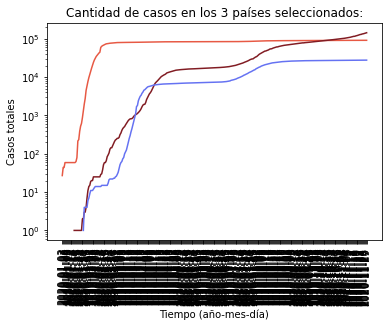

In [1]:
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

def wget(url):
    r = requests.get(url, allow_redirects=True)
    with open(url[url.rfind('/') + 1::], 'wb') as f:
        f.write(r.content)

wget ("https://covid.ourworldindata.org/data/ecdc/full_data.csv")

df = pd.read_csv('full_data.csv', header=0)
datos_records = df.to_dict('records')

#Menu de bienvenida

print("Programa para ver la cantidad de casos de n países en escala logarítmica, en un intervalo de tiempo.")
print("¿Cuántos países desea ver?")
num = int(input("Ingrese la cantidad de países: "))

#Lista predefinida

mundo_lista = []

for record in datos_records:
    if record['location'] == 'World':
        mundo_lista.append(record)

mundo_dict = dict()

for caso in mundo_lista:
    mundo_dict[caso['date']] = caso['total_cases']

WorldDates = set()

for x in mundo_dict:
    WorldDates.add(x)

WorldList = list(WorldDates)
WorldList.sort(key=lambda date: datetime.strptime(date, '%Y-%m-%d'))

#Intervalo de tiempo

WorldList_acotada = list()
WorldList_acotada.sort(key=lambda date: datetime.strptime(date, '%Y-%m-%d'))

print("Seleccione la fecha de comienzo del intervalo:")
year_ini = int(input('Ingrese el año: '))
month_ini = int(input('Ingrese el mes: '))
day_ini = int(input('Ingrese el dia: '))
print("Seleccione la fecha de fin del intervalo:")
year_end = int(input('Ingrese el año: '))
month_end = int(input('Ingrese el mes: '))
day_end = int(input('Ingrese el dia: '))
date_ini_dt = datetime(year_ini, month_ini, day_ini)
date_end_dt = datetime(year_end, month_end, day_end)

date_ini = date_ini_dt.strftime('%Y-%m-%d')
date_end = date_end_dt.strftime('%Y-%m-%d')

print("Fecha de inicio")
print(date_ini)
print("Fecha final")
print(date_end)

for i in range(1, len(WorldList)):
    if (date_ini < WorldList[i] and date_end > WorldList[i]):
        WorldList_acotada.append(WorldList[i])

#Lista seguridad

archivo = pd.read_csv("full_data.csv")
data = archivo.to_dict("list")

varComprobar = []

for i in range(0, len(data["date"])):
    varComprobar.append(data['location'][i])

setComprobar = set()

for x in varComprobar:
    setComprobar.add(x)

listComprobar = list()
listComprobar = list(setComprobar)

print("Lista de países posibles:")
print(listComprobar)

# Ciclo para n países

for i in range(0, num, 1):
    z = i + 1

    # Seguridad variable país

    l1 = (input("Ingrese el país número %s : " % z))

    if l1 in listComprobar:
        print("País encontrado.")
    else:
        z = 1
        while z == 1:
            print("Incorrecto. Debe ingresar un país posible, primer letra en mayúscula.")
            l1 = (input("Ingrese el país número %s : " % z))
            if l1 in listComprobar:
                print("País encontrado.")
                z = 0

    # Para que tengan los mismos dates

    t1 = []

    for record in datos_records:
        if record['location'] == l1:
            t1.append(record)

    s1 = dict()

    for caso in t1:
        s1[caso['date']] = caso['total_cases']

    casos_l1 = []
    last_l1 = 0

    for date in WorldList_acotada:
        if date in s1:
            casos_l1.append(s1[date])
        else:
            casos_l1.append(last_l1)

        last_l1 = casos_l1[-1]

    plt.plot(WorldList_acotada, casos_l1, c=np.random.rand(3, ))

#Imprimir gráfico

plt.yscale("log")
plt.title('Cantidad de casos en los %s países seleccionados:'% num)
plt.ylabel('Casos totales')
plt.xlabel('Tiempo (año-mes-día)')
plt.xticks(rotation=90)
plt.show()